# Tips Adlƒ± Veri Setini ƒ∞nceleme 

In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
df = tips.copy()

In [3]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.describe().T

count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00

## Katogorik deƒüi≈ükenlere ve aralarƒ±nda ili≈ükiye baktƒ±k 
* Aklƒ±mƒ±za gelen ilk soru acaba bahi≈üi≈ü miktarƒ±nƒ± etkileyen fakt√∂rler nelerdir 

In [7]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [9]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [10]:
df[["smoker","sex"]].value_counts()

smoker  sex   
No      Male      97
Yes     Male      60
No      Female    54
Yes     Female    33
Name: count, dtype: int64

In [12]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
df[["day", "time"]].value_counts()

day   time  
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
Fri   Dinner    12
      Lunch      7
Thur  Dinner     1
Name: count, dtype: int64

In [9]:
df.groupby("sex", observed = True)["tip"].mean() # Cinsiyete G√∂re Verilen Bah≈üi≈ülerin Ortalamasƒ±

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

## Bah≈üi≈ü Miktarƒ±nƒ± etkileyen Fakt√∂rler 

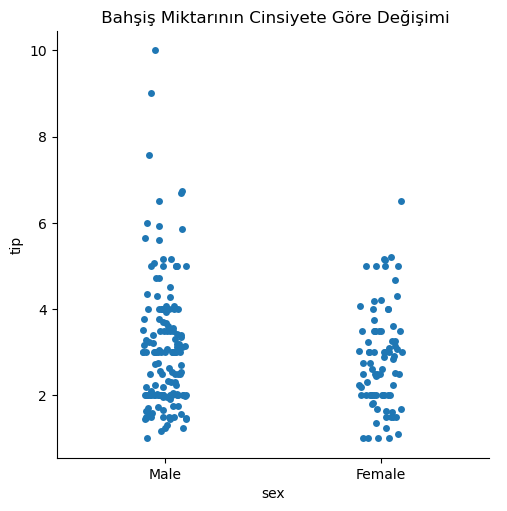

In [26]:
sns.catplot(x ="sex" , y ="tip" , data = df);
plt.title(" Bah≈üi≈ü Miktarƒ±nƒ±n Cinsiyete G√∂re Deƒüi≈üimi")
plt.show()

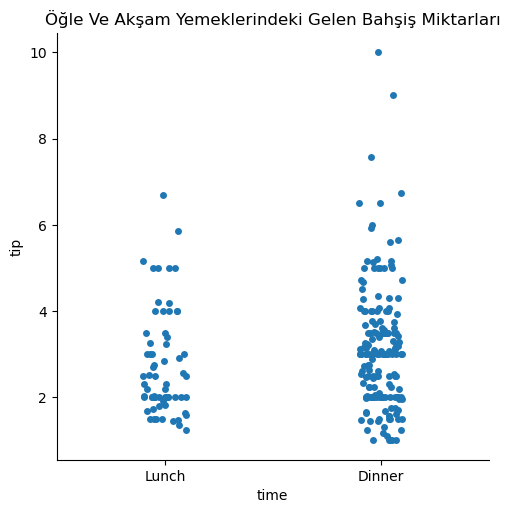

In [29]:
sns.catplot(x = "time",y ="tip",data = df);
plt.title("√ñƒüle Ve Ak≈üam Yemeklerindeki Gelen Bah≈üi≈ü Miktarlarƒ±")
plt.show()

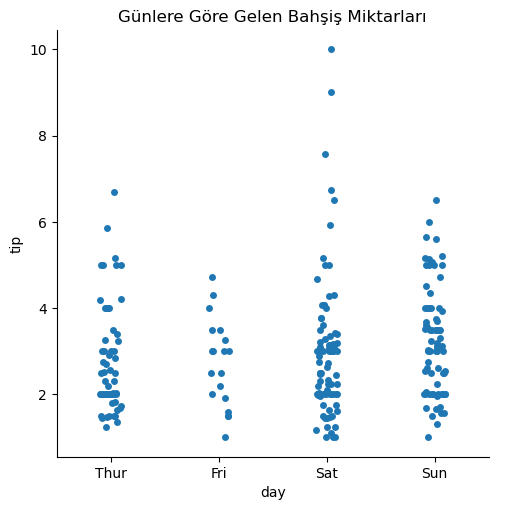

In [32]:
sns.catplot(x = "day",y ="tip",data = df);
plt.title("G√ºnlere G√∂re Gelen Bah≈üi≈ü Miktarlarƒ±")
plt.show()

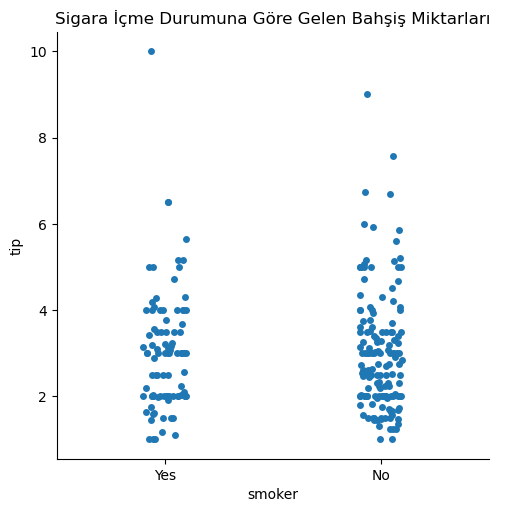

In [33]:
sns.catplot(x = "smoker",y ="tip",data = df);
plt.title("Sigara ƒ∞√ßme Durumuna G√∂re Gelen Bah≈üi≈ü Miktarlarƒ±")
plt.show()

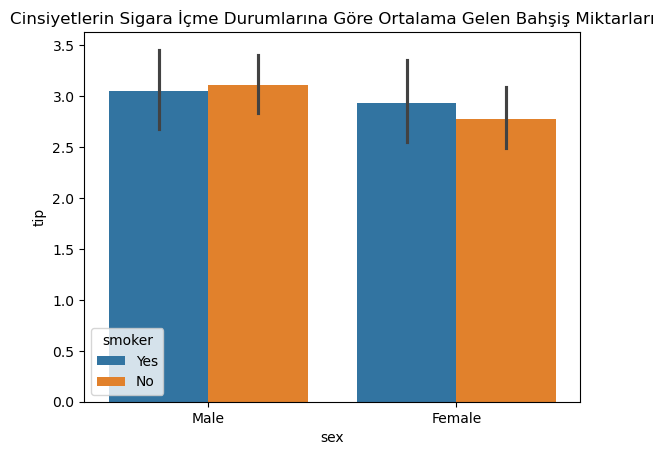

In [54]:
sns.barplot(x = "sex", y = "tip", hue = "smoker", data = df);
plt.title("Cinsiyetlerin Sigara ƒ∞√ßme Durumlarƒ±na G√∂re Ortalama Gelen Bah≈üi≈ü Miktarlarƒ±")
plt.show()

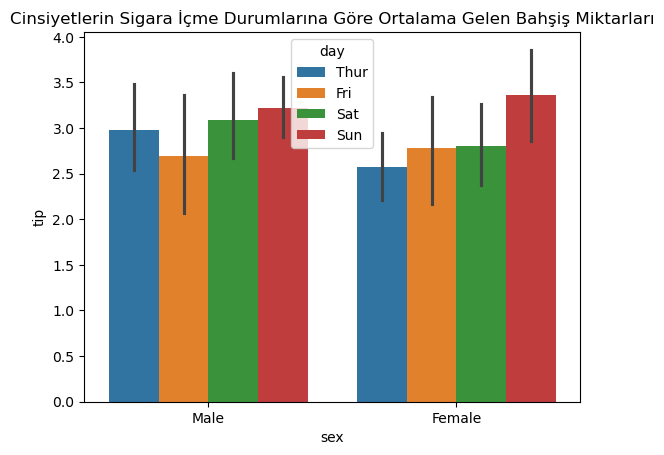

In [5]:
sns.barplot(x = "sex", y = "tip", hue = "day", data = df);
plt.title("Cinsiyetlerin Sigara ƒ∞√ßme Durumlarƒ±na G√∂re Ortalama Gelen Bah≈üi≈ü Miktarlarƒ±")
plt.show()

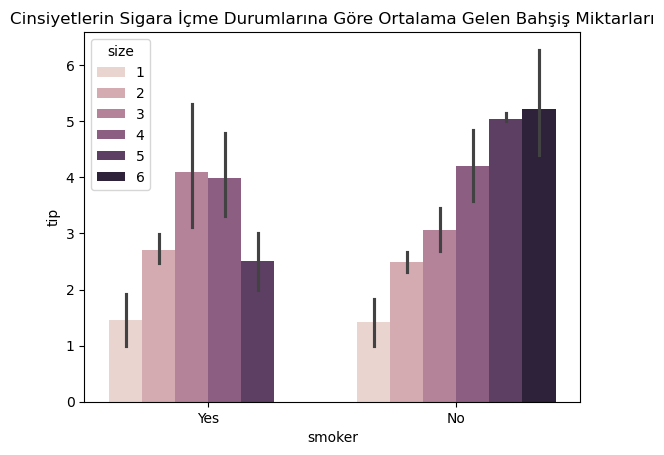

In [13]:
sns.barplot(x = "smoker", y = "tip", hue = "size", data = df);
plt.title("Cinsiyetlerin Sigara ƒ∞√ßme Durumlarƒ±na G√∂re Ortalama Gelen Bah≈üi≈ü Miktarlarƒ±")
plt.show()

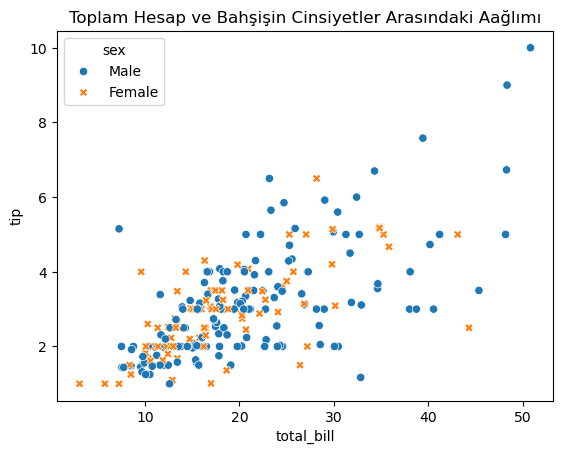

In [4]:
sns.scatterplot(data = df, x = "total_bill", y = "tip", hue = "sex", style= "sex");
plt.title("Toplam Hesap ve Bah≈üi≈üin Cinsiyetler Arasƒ±ndaki Aaƒülƒ±mƒ±")
plt.show()

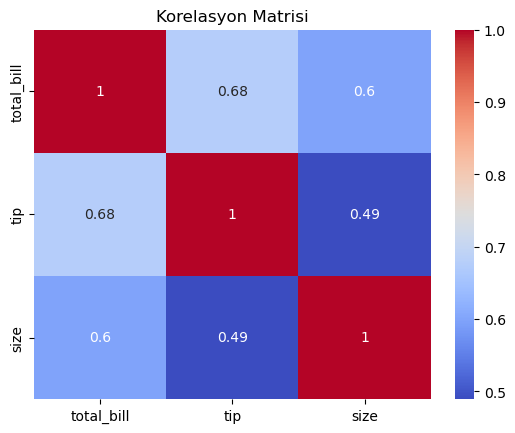

In [11]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm");
plt.title("Korelasyon Matrisi")
plt.show()

## Bah≈üi≈ü Oranƒ± 

In [15]:
df["Bahsis_Orani"] = (df.tip / df.total_bill) * 100
df[["Bahsis_Orani", "tip", "total_bill"]].head()

Bahsis_Orani   tip  total_bill
0      5.944673  1.01       16.99
1     16.054159  1.66       10.34
2     16.658734  3.50       21.01
3     13.978041  3.31       23.68
4     14.680765  3.61       24.59

In [16]:
df.groupby("Bahsis_Orani")[["tip","total_bill"]].mean()

tip  total_bill
Bahsis_Orani                  
3.563814      1.17       32.83
5.643341      2.50       44.30
5.679667      1.50       26.41
5.944673      1.01       16.99
6.565988      2.00       30.46
...            ...         ...
28.053517     6.50       23.17
29.198966     3.39       11.61
32.573290     1.00        3.07
41.666667     4.00        9.60
71.034483     5.15        7.25

[241 rows x 2 columns]

# Tips Verisinin ƒ∞ncelemlerini Yaptƒ±k ≈ûimdi ƒ∞se Tip Deƒüerini Tahmin Eden Bir Uygulama Yapalƒ±m

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df.head()

total_bill   tip     sex smoker  day    time  size  Bahsis_Orani
0       16.99  1.01  Female     No  Sun  Dinner     2      5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3     16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3     16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2     13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4     14.680765

In [20]:
# Hedef Deƒüi≈üken 
y = df["tip"]

# Girdi deƒüi≈ükenleri (katagorik + sayƒ±sal)
x = df.drop("tip", axis=1)

In [21]:
# Katagorik Ve Sayƒ±sal Deƒüi≈ükenlerin belirlenmesi
numeric_features = ["total_bill","size","Bahsiz_Orani"]
categorical_features = ["sex","smoker","day","time"]

## Pipeline olu≈ütur

In [22]:
# Kategorik veriler i√ßin OneHotEncoder tanƒ±mla  
# yani katagorik deƒüi≈ükenleri sayƒ±sal deƒüere d√∂n√º≈üt√ºr
categorical_transformer = OneHotEncoder(drop="first") #First ilk katagorik deƒüi≈ükeni atar
# √∂rneƒüin sadece female kalƒ±r o da 0 ise female deƒüil 1 ise female olarak tutar 

In [31]:
# S√ºtun d√∂n√º≈üt√ºr√ºc√º: kategorik ve sayƒ±sallarƒ± birle≈ütir
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough", # Sayƒ±sal s√ºtunlarƒ± olduƒüu gibi ekle
    verbose_feature_names_out=False,  # daha okunaklƒ± s√ºtun isimleri
    force_int_remainder_cols=False    # ƒ∞simlerle tut, uyarƒ±yƒ± da sustur    
)

In [32]:
# Pipeline olu≈ütur: √ñn i≈üleme + Regresyon Modeli
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Veriyi Eƒüitim Ve Test Olarak Ayƒ±r

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## üìå train_test_split(...)
Bu fonksiyon, X (baƒüƒ±msƒ±z deƒüi≈ükenler / input features) ve y (baƒüƒ±mlƒ± deƒüi≈üken / hedef deƒüi≈üken) verilerini rastgele ≈üekilde ikiye b√∂ler:

Eƒüitim verisi (Training set): Modelin √∂ƒürenmesi i√ßin kullanƒ±lƒ±r.

Test verisi (Test set): Modelin √∂ƒürendiklerini test etmek, yani performansƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lƒ±r.

## Modeli eƒüit

In [60]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression())])

## Tahmin yap ve ba≈üarƒ±yƒ± √∂l√ß

In [61]:
y_pred = model.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test,y_pred))

MSE:  0.15182643271025364
R2:  0.9211508532345293


‚úÖ A√ßƒ±klama:
Bu satƒ±rda, daha √∂nce Pipeline ile olu≈üturduƒüun model'in, test verileri (X_test) √ºzerinde tahmin yaptƒ±ƒüƒ± adƒ±m yer alƒ±yor.

Detaylƒ± olarak:
model bir Pipeline nesnesidir. ƒ∞√ßinde ≈üu iki adƒ±m bulunur:

√ñni≈üleme (preprocessor): OneHotEncoder gibi d√∂n√º≈ü√ºmler.

Tahmin modeli: √ñrneƒüin bir LinearRegression ya da ba≈üka bir regresyon modeli.

predict(X_test) fonksiyonu, test verilerini √∂nce preprocessor ile i≈üler, ardƒ±ndan regresyon modeli bu i≈ülenmi≈ü verileri kullanarak tahmin yapar.

Tahmin sonu√ßlarƒ± y_pred adlƒ± bir deƒüi≈ükende saklanƒ±r.

y_pred: Modelin tahmin ettiƒüi hedef deƒüerlerdir (baƒüƒ±mlƒ± deƒüi≈üken).

üìè Kod:
python
Kodu kopyala
print("MSE:", mean_squared_error(y_test, y_pred))
‚úÖ A√ßƒ±klama:
Bu satƒ±r, Mean Squared Error (Ortalama Kare Hatasƒ±) deƒüerini hesaplar ve ekrana yazdƒ±rƒ±r.

Detaylƒ± olarak:
y_test: Ger√ßek (doƒüru) etiketlerdir.

y_pred: Modelin tahmin ettiƒüi etiketlerdir.

mean_squared_error(...): Bu iki k√ºme arasƒ±ndaki farkƒ±n karelerinin ortalamasƒ±nƒ± alƒ±r.

MSE neyi g√∂sterir?

Tahminlerin ne kadar hatalƒ± olduƒüunu sayƒ±sal olarak g√∂sterir.

Deƒüeri 0‚Äôa ne kadar yakƒ±nsa, modelin tahminleri ger√ßek deƒüerlere o kadar yakƒ±ndƒ±r.

Birimi, hedef deƒüi≈ükenin karesine g√∂redir (√∂rneƒüin hedef deƒüi≈üken TL ise, MSE birimi TL¬≤ olur).

üìà Kod:
python
Kodu kopyala
print("R¬≤  :", r2_score(y_test, y_pred))
‚úÖ A√ßƒ±klama:
Bu satƒ±r, modelin doƒüruluk oranƒ±nƒ± √∂l√ßen R-kare (R¬≤) skorunu hesaplar.

Detaylƒ± olarak:
r2_score(...): Regresyon modelinin ne kadar ba≈üarƒ±lƒ± olduƒüunu √∂l√ßmek i√ßin kullanƒ±lƒ±r.

R¬≤ skoru nedir?

Deƒüer aralƒ±ƒüƒ± genellikle -‚àû ile 1 arasƒ±ndadƒ±r.

1 ‚Üí M√ºkemmel tahmin (model %100 doƒüru tahmin ediyor).

0 ‚Üí Model, hi√ßbir i≈üe yaramƒ±yor demek (ortalama deƒüer kadar bile tahmin edememi≈ü).

Negatif deƒüerler ‚Üí Model, rastgele tahmin yapsaydƒ± bile daha iyi olurdu demek.

Yani: R¬≤, "baƒüƒ±mlƒ± deƒüi≈ükendeki varyansƒ±n ne kadarƒ±nƒ± baƒüƒ±msƒ±z deƒüi≈ükenlerle a√ßƒ±klayabildik?" sorusunun cevabƒ±dƒ±r.

üîß K√º√ß√ºk bir √∂rnek:
Diyelim ki ev fiyatlarƒ±nƒ± tahmin etmeye √ßalƒ±≈üƒ±yorsun:

Ger√ßek fiyatlar (y_test): [300,000, 350,000, 400,000]

Tahmin edilen fiyatlar (y_pred): [310,000, 345,000, 390,000]

mean_squared_error bu iki liste arasƒ±ndaki farklarƒ±n karesini alƒ±r, sonra ortalamasƒ±nƒ± alƒ±r.

r2_score ise, bu tahminlerin ger√ßek deƒüerleri ne kadar doƒüru a√ßƒ±kladƒ±ƒüƒ±nƒ± hesaplar.

√ñzetle:
Kod Satƒ±rƒ±	Ne Yapar?
y_pred = model.predict(X_test)	Test verileri i√ßin tahmin √ºretir
mean_squared_error(y_test, y_pred)	Tahmin hatasƒ±nƒ±n ortalama karesini verir
r2_score(y_test, y_pred)	Modelin doƒüruluk oranƒ±nƒ± (ba≈üarƒ± y√ºzdesini) verir

# Ger√ßek vs Tahmin Grafiƒüi 

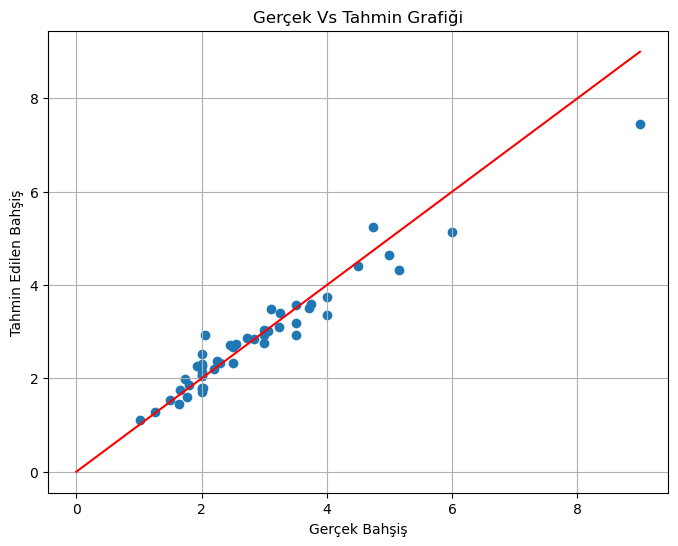

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Ger√ßek Bah≈üi≈ü")
plt.ylabel("Tahmin Edilen Bah≈üi≈ü")
plt.title("Ger√ßek Vs Tahmin Grafiƒüi")
plt.plot([0, max(y_test)],[0 , max(y_test)], color = "red")
plt.grid(True)
plt.show()